In [18]:
import pandas as pd
import numpy as np
import os
import urllib.request
import xgboost
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split

In [19]:
if 'df_realestate.csv' not in os.listdir('data'):
    url = 'https://s3.amazonaws.com/datasets-jeremy/df_realestate.csv'  
    urllib.request.urlretrieve(url, os.path.join('data', 'df_realestate.csv')) 
    
if 'df_realestate_processed.csv' not in os.listdir('data'):
    url = 'https://s3.amazonaws.com/datasets-jeremy/df_realestate_processed.csv'  
    urllib.request.urlretrieve(url, os.path.join('data', 'df_realestate_processed.csv'))  

In [20]:
# processed
path = "data//df_realestate_processed.csv"
df_realestate_processed = pd.read_csv(path)
O = df_realestate_processed
X = df_realestate_processed.drop(["price_per_meter", "total_price"], axis=1)
Y = df_realestate_processed['total_price']


In [21]:
# Start Your Code Here

In [ ]:
X_train = X.iloc[:-40000]
Y_train = Y.iloc[:-40000]
Y_train = np.log(Y_train) 

X_valid = X.iloc[-40000:]
Y_valid = Y.iloc[-40000:]
Y_valid = np.log(Y_valid) 

In [ ]:
# X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size =0.94, random_state=1212)  ## 一般如果測試資料集超過1000筆就可以了，所以比率不會設這麼高
print(X_train.shape)  ## (445, 17)
print(X_valid.shape)  ## (446, 17) 
print(Y_train.shape)  ## (445,)
print(Y_valid.shape)  ## (446,)

(12950, 252)
(40000, 252)
(12950,)
(40000,)


In [ ]:
# Set our parameters for xgboost
params = {}

# 請填入以下參數: 
# 目標函數: 線性回歸
# 評價函數: rmse
# 學習速度: 0.01
# 最大深度: 5
# bst = xgboost.train(params, d_train, 3000, watchlist, early_stopping_rounds=50, verbose_eval=10)
#=============your works starts===============#
params['objective'] = 'reg:linear'
params['eval_metric'] = 'rmse'
params['eta'] = 0.04
params['max_depth'] = 6
d_train = xgboost.DMatrix(X_train, label=Y_train)
d_valid = xgboost.DMatrix(X_valid, label=Y_valid)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
bst = xgboost.train(params, d_train, 3000, watchlist, early_stopping_rounds=10, verbose_eval=1)
Y_pred = bst.predict(xgboost.DMatrix(X_valid))
#==============your works ends================#


[13:29:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:15.681	valid-rmse:15.6314
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[13:29:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:15.0546	valid-rmse:15.0051
[13:29:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[2]	train-rmse:14.4531	valid-rmse:14.4036
[13:29:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:13.8758	valid-rmse:13.8266
[13:29:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pr

[13:29:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[84]	train-rmse:0.563916	valid-rmse:0.576531
[13:29:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[85]	train-rmse:0.545153	valid-rmse:0.558868
[13:29:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[86]	train-rmse:0.527181	valid-rmse:0.542203
[13:29:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[87]	train-rmse:0.510101	valid-rmse:0.526407
[13:29:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[88]	train-rmse:0.493778	valid-rmse:0.511394
[13:29:07] C:\Users\

[13:29:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[167]	train-rmse:0.20425	valid-rmse:0.286516
[13:29:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[168]	train-rmse:0.203987	valid-rmse:0.286843
[13:29:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[169]	train-rmse:0.203764	valid-rmse:0.287016
[13:29:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[170]	train-rmse:0.203555	valid-rmse:0.286999
[13:29:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[171]	train-rmse:0.203202	valid-rmse:0.286925
[13:29:12] C:\Us

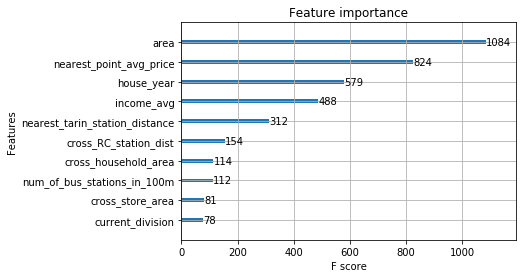

In [ ]:
# 請使用 xgboost.plot_importance，並設定max_num_features=10
#!=============your works starts===============!#
xgboost.plot_importance(bst, max_num_features=10)
#!==============your works ends================!#

plt.show()

In [ ]:
df_result = pd.DataFrame()

Y_pred = bst.predict(xgboost.DMatrix(X_valid))
df_result['predict'] = np.exp(Y_pred)
df_result['truth'] = np.exp((list(Y_valid)))
df_result['error'] = df_result.apply(lambda x:np.abs(x['predict'] - x['truth']) / x['truth'], axis=1)
df_result_sort = df_result.sort_values('truth')

df_result[df_result['error'] > 1]

In [ ]:
df_result_sort.loc[df_result_sort['error'] < 1, 'error'].plot('hist')

plt.show()

In [ ]:
plt.scatter(range(len(df_result)), df_result_sort['predict'].values, color='black',s=0.5)
plt.scatter(range(len(df_result)), df_result_sort['truth'].values, color='red',s=0.5)

In [ ]:
error = df_result[df_result['error'] > 1]
important = error.index
len(important)

In [ ]:
print(x_train.shape)
ca = x.iloc[important] 

print(ca.shape)
ba = pd.concat([x_train, ca])

print(ba.shape)
print(ba.index.values)
# print(x.shape)

In [ ]:
# x_train = x.iloc[:-40000]
# y_train = y.iloc[:-40000]
# y_train = np.log(y_train) 

# x_valid = x.iloc[-40000:]
# y_valid = y.iloc[-40000:]
# y_valid = np.log(y_valid) 

In [ ]:
# datas = [ 47, 68, 47, 88, 58, 49, 65  20  97, 86, 54, 53, 87, 
# 15, 35, 32, 98, 23, 88, 100, 8, 54, 15, 66, 89, 33,
# 30, 52, 52, 84]
# df1 = pd.DataFrame(datas, columns=['num'])
# print(df1.shape)

# df2 = pd.DataFrame(['a','b','c'], columns=['num'])
# print(df2.shape)

# df3 = pd.concat([df1, df2])
# print(df3.shape)
# print(df3.tail(6))

In [ ]:
# df = pd.DataFrame(['a','b','c'], columns=['num'])
# df1 = df.iloc[0:2]
# # df1.index.values
# yy = df.drop(df1.index.values)
# yy